In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
np.random.seed(1234)
S, N = 10000, 50000
shape = 5
scale = shape / np.random.gamma(2,size=N)
data = []
for i in range(S):
    sample = np.random.gamma(shape, scale[i], size=N)
    data.append(np.mean(np.log(sample)))

In [22]:
counts, edges = np.histogram(data,bins=50)
counts = counts / (np.sum(counts) * (edges[1] - edges[0]))
bin_centers = (edges[1:] + edges[:-1]) / 2

# Compute mean and standard deviation from the histogram
total_count = np.sum(counts)
mean = np.sum(bin_centers * counts) / total_count
variance = np.sum(((bin_centers - mean) ** 2) * counts) / total_count
std_dev = np.sqrt(variance)

# shift and rescale
bin_centers = (bin_centers - mean) / std_dev
counts = counts * np.sqrt(2 * np.pi * std_dev**2)

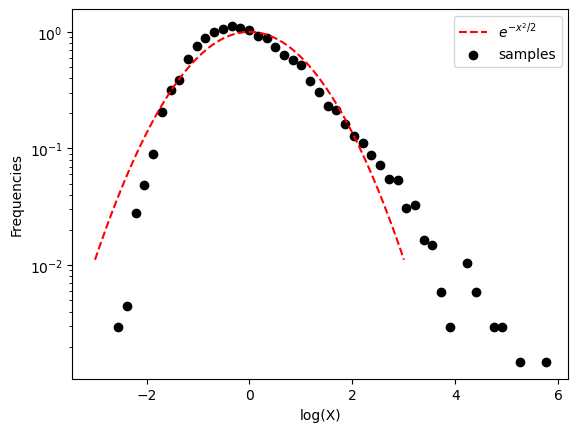

In [23]:
xrange = np.linspace(-3,3,1000)
f = np.exp(-0.5 * xrange**2)

plt.plot(xrange, f, c="r", ls="--", label='$e^{-x^2/2}$')
plt.scatter(bin_centers, counts, c="black", label='samples')
plt.yscale('log')
plt.xlabel('log(X)')
plt.ylabel('Frequencies')
plt.legend()
plt.show()